## MoA Baseline calculation
The very first thing one should do in any competition is produce a **baseline score** against which one can measure the performance of our model. In a classification problem a good baseline to start from is to calculate the score produced what is known as the [Zero Rule](https://machinelearningcatalogue.com/algorithm/alg_zero-rule.html) classifier (aka. *ZeroR* or *0-R*), and it simply consists of the majority class (i.e. the mode) of the dataset. For example in this case hypothesizing that it is more likely than not that there is no positive response to anything:

In [ ]:
import pandas as pd
import numpy  as np

In [ ]:
sample = pd.read_csv('../input/lish-moa/sample_submission.csv')
sample.iloc[:,1:] = 0.0
sample.to_csv('submission.csv',index=False)

Which produces a score of:
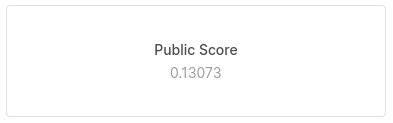

However, in this particular competition we are asked to predict probabilities, and not classes. In the book ["Deep Learning with Python"](https://www.manning.com/books/deep-learning-with-python) by [François Chollet](https://fchollet.com/) he suggests making a *common-sense* baseline. Given that in this competition we are asked to predict probabilities, and we are given a file of scored MoA targets by the competition organizers, this would be a good place to start. In his own words

> [Baseline] *...the highest score you can reach without looking at the test features (or validation features in this case). Let's use the positivity rate of each target as measured in the training subset to generate predictions for the validation subset.*

The following snippet of code is adapted from Chollet's excellent notebook ["MoA: Keras + KerasTuner best practices"](https://www.kaggle.com/fchollet/moa-keras-kerastuner-best-practices):

In [ ]:
# read in 
scored     = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
sample     = pd.read_csv('../input/lish-moa/sample_submission.csv')

# calculate
predictions = []
for target_name in list(scored)[1:]:
    rate = float(sum(scored[target_name])) / len(scored)
    predictions.append(rate)
predictions = np.array( [predictions] * len(sample) )

# write out
sample.iloc[:,1:] = predictions
sample.to_csv('submission.csv',index=False)

Which gives a baseline of:
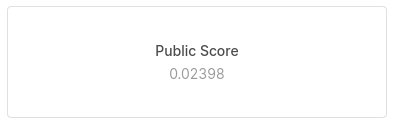

It is now our objective in this competition to develop a model that results in a score that is *lower* than this value (but without overfitting!)